# Examen Final

## Métodos Computacionales 2

El examen es **individual** incluyendo la no colaboración entre compañeros de grupo. Se permite hacer uso de internet durante el examen, excepto aplicaciones de mesj (**No whatsapp o email**) o aplicaciones de modelos de inteligencia artificial (**No chatGPT**). **Cite** brevemente sus fuentes de código, incluyendo código que toma de sus talleres o del github.

Instrucciones: Suba el jupyter notebook **.ipynb** en la actividad de bloque neon. El archivo debe ser nombrado ApellidoNombre_ExamenFinal.ipynb, con su primer Apellido y Nombre. **El archivo debe poder correr en el binder del curso**.
Si un numeral del ejercicio se demora **más de 10 segundos** en correr se considerará **incorrecto**.

No modifique el cuaderno, ni los modos de lectura de los archivos.

**Entrega: Viernes 29 de Septiembre 1:50 pm**

## Librerias

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from mpl_toolkits.mplot3d import Axes3D
plt.style.use('dark_background')

## Problema 1

a) El archivo de texto dow.txt contiene la información del promedio de los precios en el mercado de acciones de Estados Unidos de la empresa Dow Jones. \\

Elimine el ruido de la señal de acciones asignando igual a cero el 95% de las frecuencias altas (del espacio de frecuencias) de la señal.

Gráfique la señal sin ruido junto con la señal original.

In [2]:
# codigo para leer los datos no modificar

df = pd.read_csv("https://raw.githubusercontent.com/diegour1/Datafiles/main/Datafiles/dow.txt")

data_reshaped = df.to_numpy().reshape(-1,).tolist()

# su codigo aqui


In [3]:
amplitud = np.fft.fft(data_reshaped)
frecuencia = np.fft.fftfreq(len(data_reshaped))

In [4]:
num_data = int(round(len(data_reshaped) * 0.95, 0))

amplitud_copy = amplitud.copy()
amplitud_copy[:num_data] = 0


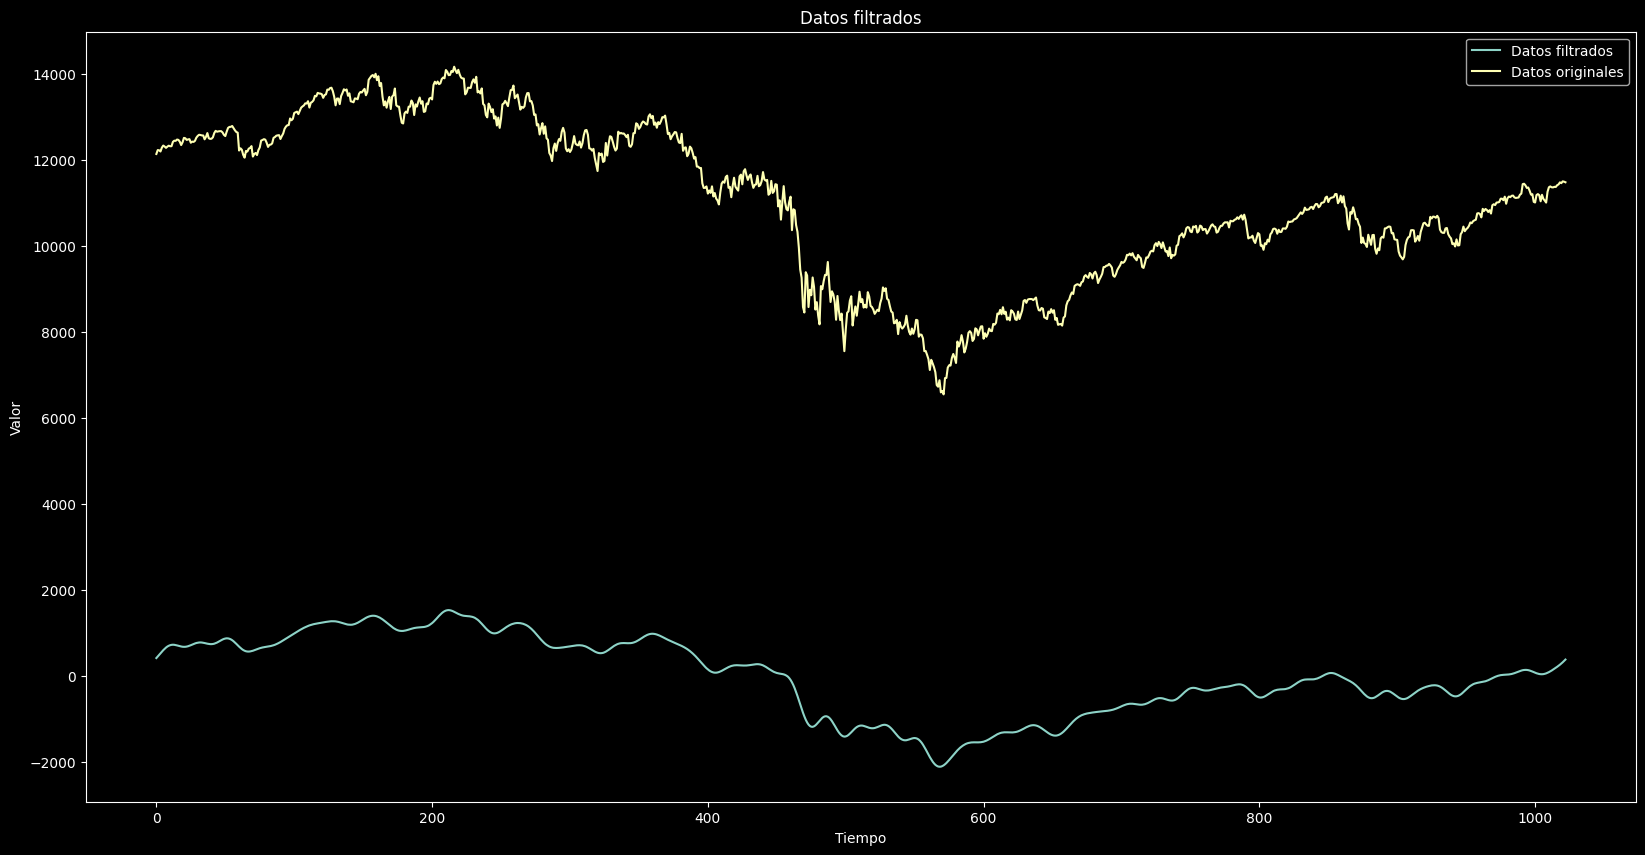

In [5]:
new_data = np.fft.ifft(amplitud_copy).real.astype(int)

plt.figure(figsize=(20, 10))
plt.plot(new_data, label='Datos filtrados')
plt.plot(data_reshaped, label='Datos originales')
plt.title('Datos filtrados')
plt.xlabel('Tiempo')
plt.ylabel('Valor')
plt.legend()
plt.show()



b) Realice un gráfico que ilustre las cuatro primeras señales que conforman el espacio tiempos de los datos.

In [6]:
index = np.argsort(amplitud)[-4:]
print("Frecuencias mas fuertes: ", frecuencia[index])


Frecuencias mas fuertes:  [-0.00488759  0.00097752 -0.00097752  0.        ]


In [7]:
waves = [np.sin(2*np.pi*frecuencia[index[0]]*np.arange(len(data_reshaped))), 
         np.sin(2*np.pi*frecuencia[index[1]]*np.arange(len(data_reshaped))),
         np.sin(2*np.pi*frecuencia[index[2]]*np.arange(len(data_reshaped))),
         np.sin(2*np.pi*frecuencia[index[3]]*np.arange(len(data_reshaped)))]

<Figure size 2000x2000 with 0 Axes>

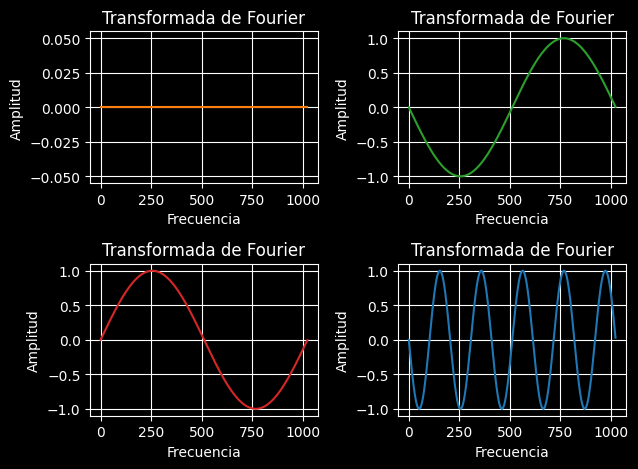

In [8]:
#plot strong frequencies
plt.figure(figsize=(20,20))
fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(waves[3], 'tab:orange')
axs[0, 0].set_title('Transformada de Fourier')
axs[0, 0].set_xlabel('Frecuencia')
axs[0, 0].set_ylabel('Amplitud')
axs[0, 0].grid(True)
axs[0, 1].plot(waves[2], 'tab:green')
axs[0, 1].set_title('Transformada de Fourier')
axs[0, 1].set_xlabel('Frecuencia')
axs[0, 1].set_ylabel('Amplitud')
axs[0, 1].grid(True)
axs[1, 0].plot(waves[1], 'tab:red')
axs[1, 0].set_title('Transformada de Fourier')
axs[1, 0].set_xlabel('Frecuencia')
axs[1, 0].set_ylabel('Amplitud')
axs[1, 0].grid(True)
axs[1, 1].plot(waves[0], 'tab:blue')
axs[1, 1].set_title('Transformada de Fourier')
axs[1, 1].set_xlabel('Frecuencia')
axs[1, 1].set_ylabel('Amplitud')
axs[1, 1].grid(True)
plt.tight_layout()
plt.show()


## Problema 2

a) Resuelva el siguiente sistema de ecuaciones diferenciales ordinarias y haga un gráfico en 3D del sistema,

\begin{align}
\frac{d{x}}{dt} &=  - y - z\\
\frac{d{y}}{dt} &=  x + 0.2 y \\
\frac{d{z}}{dt} &=  0.3 + z (x - 6) \\
\end{align}

Con las siguientes condiciones iniciales,

$x_0 = 0, \quad y_0 = 0, \quad z_0 = 0$

Y el tiempo tomelo entre $[0, 100]$ con pasos de $dt = 0.01$

In [9]:
dt = 0.01
x_0 = 0.001
y_0 = 0.001
z_0 = 0.00

t = np.arange(0, 100, dt)

In [10]:
# codigo adaptado de https://github.com/diegour1/MetodosComputacionales2/blob/main/Notebooks/09%20-%20Solucion_sistema_ecu_diferenciales_3_cuerpos.ipynb
def ODE(x, y, z):
    dx_dt = -y * -z
    dy_dt = x + (0.2 * y)
    dz_dt = 0.3 + z * (x - 6)
    derivs = [dx_dt, dy_dt, dz_dt]
    return derivs

In [11]:
def rungekutta4(x, y, z, dt):
    k1 = ODE(x, y, z)
    k2 = ODE(x + 0.5 * dt * k1[0], y + 0.5 * dt * k1[1], z + 0.5 * dt * k1[2])
    k3 = ODE(x + 0.5 * dt * k2[0], y + 0.5 * dt * k2[1], z + 0.5 * dt * k2[2])
    k4 = ODE(x + dt * k3[0], y + dt * k3[1], z + dt * k3[2])
    x_next = x + dt * (k1[0] + 2 * k2[0] + 2 * k3[0] + k4[0]) / 6
    y_next = y + dt * (k1[1] + 2 * k2[1] + 2 * k3[1] + k4[1]) / 6
    z_next = z + dt * (k1[2] + 2 * k2[2] + 2 * k3[2] + k4[2]) / 6
    return x_next, y_next, z_next

x = np.zeros(len(t))
y = np.zeros(len(t))
z = np.zeros(len(t))

x[0] = x_0
y[0] = y_0
z[0] = z_0

for i in range(len(t) - 1):
    x[i + 1], y[i + 1], z[i + 1] = rungekutta4(x[i], y[i], z[i], dt)
    


/tmp/ipykernel_461548/479318857.py:5: RuntimeWarning: overflow encountered in scalar multiply
  dz_dt = 0.3 + z * (x - 6)


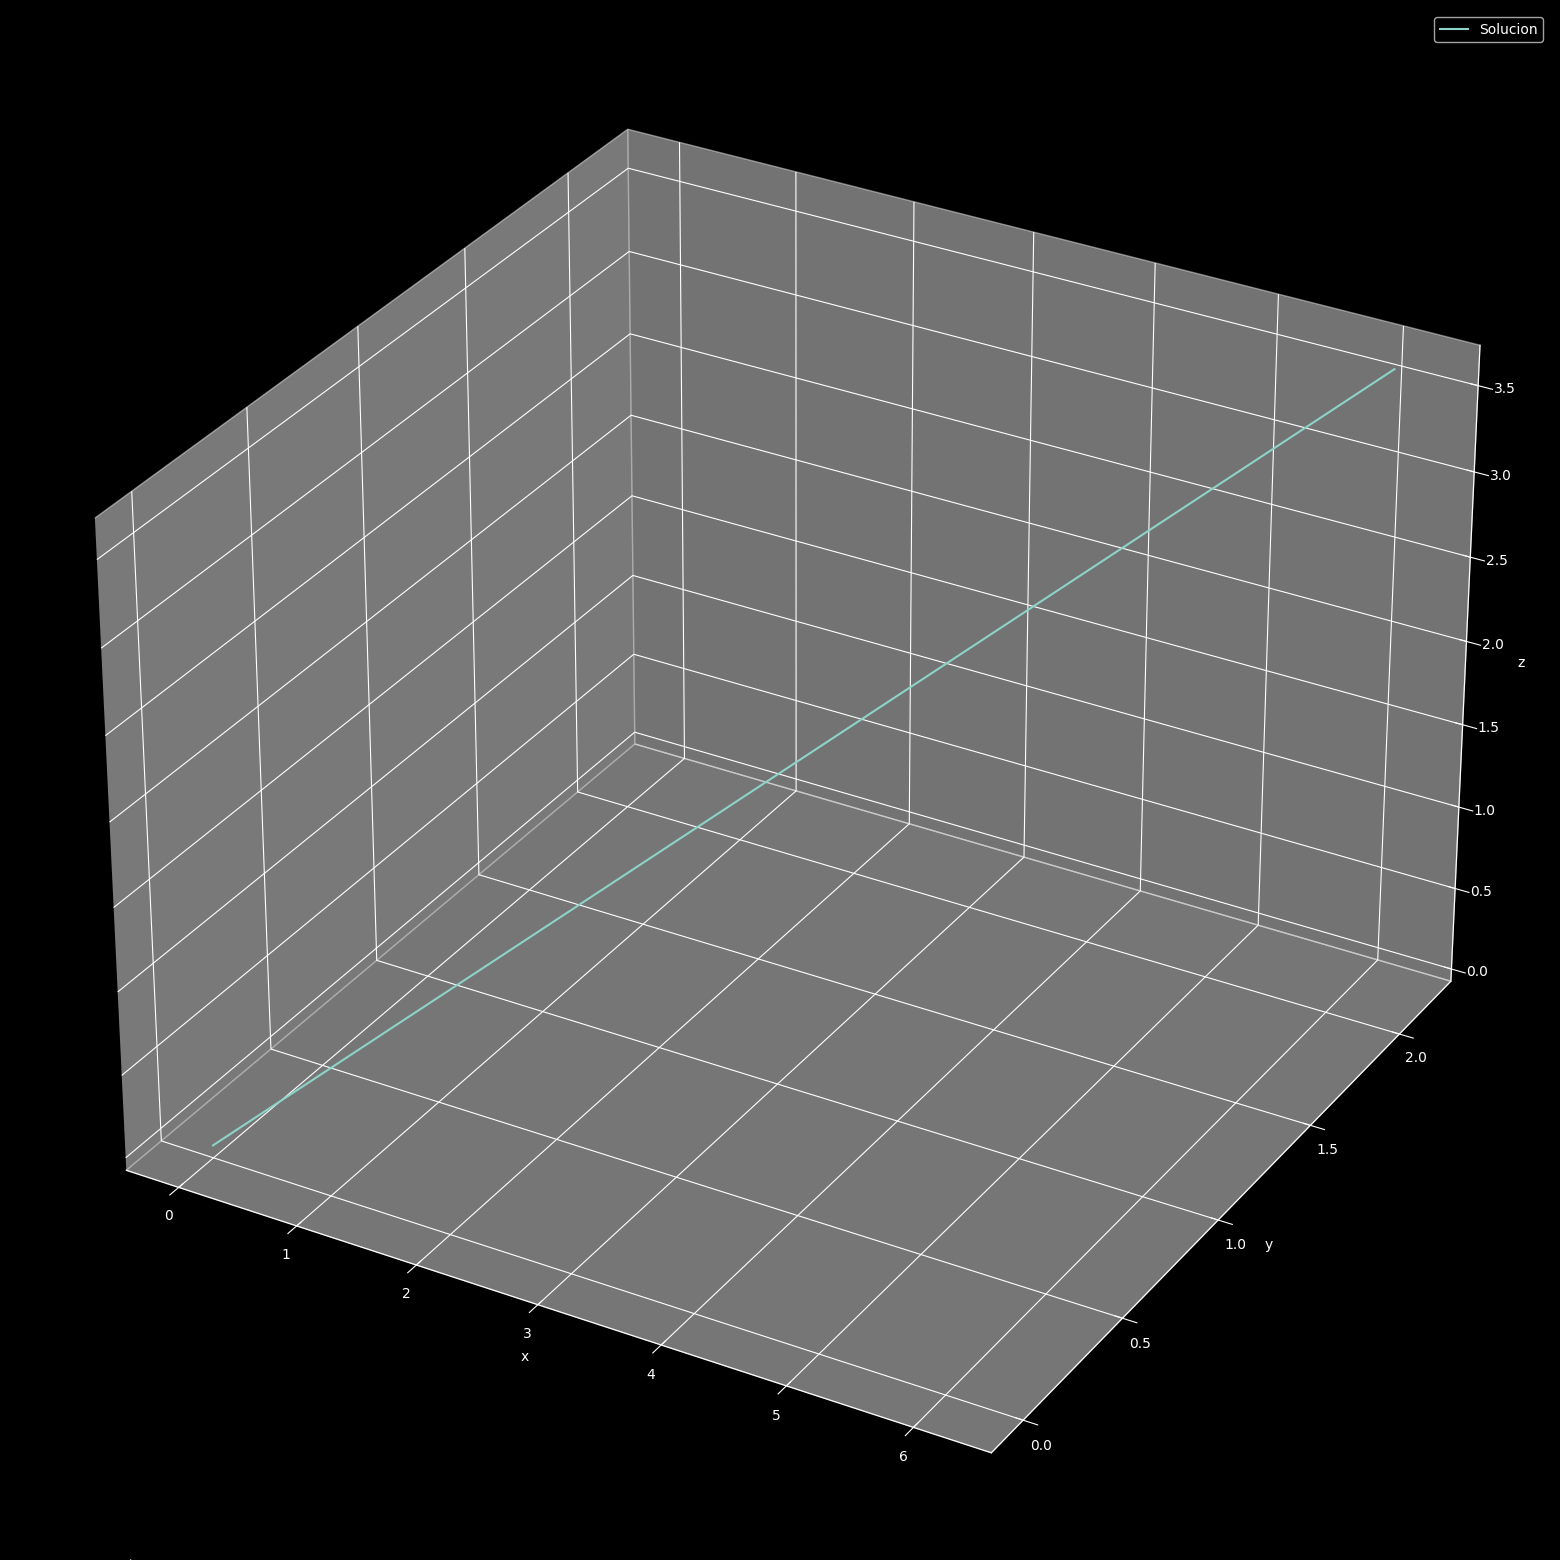

In [12]:
fig = plt.figure(figsize=(20,20)).add_subplot(111, projection='3d')
fig.plot(x, y, z, label='Solucion')
fig.set_xlabel('x')
fig.set_ylabel('y')
fig.set_zlabel('z')
fig.legend()
plt.show()

b) Usando el método de runge kutta encuentre e imprima un valor estimado de la constante de Neper $e$.

In [13]:
def ODE(x, y):
    dy_dx = np.exp(x)
    return dy_dx

def rungekutta4(x, y, dt):
    k1 = ODE(x, y)
    k2 = ODE(x + 0.5 * dt * k1, y + 0.5 * dt * k1)
    k3 = ODE(x + 0.5 * dt * k2, y + 0.5 * dt * k2)
    k4 = ODE(x + dt * k3, y + dt * k3)
    y_next = y + dt * (k1 + 2 * k2 + 2 * k3 + k4) / 6
    return y_next

x = np.arange(0, 1, 0.01)
y = np.zeros(len(x))

y[0] = 1

for i in range(len(x) - 1):
    y[i + 1] = rungekutta4(x[i], y[i], 0.01)
    
print("Valor estimado de e: ", y[-1])

Valor estimado de e:  2.6984493106696843
